In [1]:
#Download the datasets

from downloading_data import *
paths = download_datasets()
print(paths)


Path to dataset files: /Users/moyac/.cache/kagglehub/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank/versions/1
Path to dataset files: /Users/moyac/.cache/kagglehub/datasets/mahdiehhajian/life-expectancy-around-the-world/versions/1
Path to dataset files: /Users/moyac/.cache/kagglehub/datasets/iamsouravbanerjee/life-expectancy-at-birth-across-the-globe/versions/2
['/Users/moyac/.cache/kagglehub/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank/versions/1', '/Users/moyac/.cache/kagglehub/datasets/mahdiehhajian/life-expectancy-around-the-world/versions/1', '/Users/moyac/.cache/kagglehub/datasets/iamsouravbanerjee/life-expectancy-at-birth-across-the-globe/versions/2']


## Data Cleaning

In [2]:
#import packages and CSV file from Kaggle

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

df = pd.read_csv('~/Downloads/life_expectancy.csv')
df.rename(columns={'Life Expectancy World Bank': 'Life Expectancy'}, inplace=True)
df.head(3)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75


In [3]:
#dropping all categorical frames + corruption (corruption contains too many NaN)
df_numerical= df.drop(['Country Name', 'Country Code', 
                'Region', 'Corruption', 'IncomeGroup'], axis=1 )

In [4]:
#importing package for KNN to input KNN values as NaN

from sklearn.impute import KNNImputer
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import OrdinalEncoder

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Impute missing values
df_imputed = imputer.fit_transform(df_numerical)

print("Data after KNN Imputation:\n", df_imputed)

Data after KNN Imputation:
 [[2.00100000e+03 5.63080000e+01 4.78000000e+01 ... 2.17972710e+06
  9.68919370e+06 5.79542638e+06]
 [2.00100000e+03 4.70590000e+01 6.75000000e+01 ... 1.39208071e+06
  1.11902105e+07 2.66351634e+06]
 [2.00100000e+03 7.42880000e+01 4.90000000e+00 ... 1.17081670e+05
  1.40894780e+05 5.32324750e+05]
 ...
 [2.01900000e+03 6.41310000e+01 6.30000000e+00 ... 3.17467610e+06
  1.31989447e+07 1.02142619e+07]
 [2.01900000e+03 6.38860000e+01 1.67000000e+01 ... 5.10982750e+05
  4.83709400e+06 2.64968782e+06]
 [2.01900000e+03 6.14900000e+01 2.06000000e+01 ... 6.44798930e+05
  4.18708731e+06 2.36403148e+06]]


In [5]:
# Convert numpy array to dataframe 

df_numerical_knn = pd.DataFrame(df_imputed, columns =['Year', 'Life Expectancy', 
                                        'Prevelance of Undernourishment', 'CO2', 
                                        'Health Expenditure %',
'Education Expenditure %',
'Unemployment',
'Sanitation',
'Injuries',
'Communicable',
'NonCommunicable']) 
print("\nPandas DataFrame: ") 
df_numerical_knn 


Pandas DataFrame: 


,Year,Life Expectancy,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,2001.0,56.308000,47.8,730.000000,6.403979,1.238400,10.809000,8.401332,2179727.10,9689193.70,5795426.38
1,2001.0,47.059000,67.5,15960.000000,4.483516,2.200785,4.004000,13.959477,1392080.71,11190210.53,2663516.34
2,2001.0,74.288000,4.9,3230.000000,7.139524,3.458700,18.575001,40.520895,117081.67,140894.78,532324.75
3,2001.0,78.809756,5.2,520.000000,5.865939,1.824240,3.066000,21.788660,1697.99,695.56,13636.64
4,2001.0,74.544000,2.8,97200.000000,2.484370,4.878030,2.493000,74.565688,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...
3301,2019.0,70.474000,12.4,209.999993,3.360347,1.777880,1.801000,80.027224,12484.18,26032.56,69213.56
3302,2019.0,73.321000,4.4,300.000012,6.363094,4.706250,8.406000,47.698788,6652.84,9095.19,43798.62
3303,2019.0,64.131000,6.3,439640.014648,9.109355,5.917710,28.469999,59.082307,3174676.10,13198944.71,10214261.89
3304,2019.0,63.886000,16.7,6800.000191,5.312203,4.465180,12.520000,23.580352,510982.75,4837094.00,2649687.82


In [6]:
##Removing decimals from 'Year' column

Year = df_numerical_knn['Year']

# values are split at decimal point 
lst = [] 
for each in Year: 
    lst.append(str(each).split('.')[0]) 
  
# all values converting to integer data type 
final_list = [int(i) for i in lst] 

print(final_list)

[2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 200

In [7]:
#turning numerical array into dataframe

df_numerical_year = pd.DataFrame(final_list, columns =['Year']) 
print("\nPandas DataFrame: ") 
df_numerical_year 


Pandas DataFrame: 


,Year
0,2001
1,2001
2,2001
3,2001
4,2001
...,...
3301,2019
3302,2019
3303,2019
3304,2019


In [8]:
##adding Year without decimals back to numerical knn data

df_numerical_knn['Year'] = df_numerical_year
df_numerical_knn

,Year,Life Expectancy,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,2001,56.308000,47.8,730.000000,6.403979,1.238400,10.809000,8.401332,2179727.10,9689193.70,5795426.38
1,2001,47.059000,67.5,15960.000000,4.483516,2.200785,4.004000,13.959477,1392080.71,11190210.53,2663516.34
2,2001,74.288000,4.9,3230.000000,7.139524,3.458700,18.575001,40.520895,117081.67,140894.78,532324.75
3,2001,78.809756,5.2,520.000000,5.865939,1.824240,3.066000,21.788660,1697.99,695.56,13636.64
4,2001,74.544000,2.8,97200.000000,2.484370,4.878030,2.493000,74.565688,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...
3301,2019,70.474000,12.4,209.999993,3.360347,1.777880,1.801000,80.027224,12484.18,26032.56,69213.56
3302,2019,73.321000,4.4,300.000012,6.363094,4.706250,8.406000,47.698788,6652.84,9095.19,43798.62
3303,2019,64.131000,6.3,439640.014648,9.109355,5.917710,28.469999,59.082307,3174676.10,13198944.71,10214261.89
3304,2019,63.886000,16.7,6800.000191,5.312203,4.465180,12.520000,23.580352,510982.75,4837094.00,2649687.82


In [9]:
#dropping numeral columns to clean up categorical data
df_categorical= df.drop(['Corruption', 'Year',
 'Life Expectancy',
 'Prevelance of Undernourishment',
 'CO2',
 'Health Expenditure %',
 'Education Expenditure %',
 'Unemployment',
 'Sanitation',
 'Injuries',
 'Communicable',
 'NonCommunicable'], axis=1 )

df_categorical

,Country Name,Country Code,Region,IncomeGroup
0,Afghanistan,AFG,South Asia,Low income
1,Angola,AGO,Sub-Saharan Africa,Lower middle income
2,Albania,ALB,Europe & Central Asia,Upper middle income
3,Andorra,AND,Europe & Central Asia,High income
4,United Arab Emirates,ARE,Middle East & North Africa,High income
...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income
3302,Samoa,WSM,East Asia & Pacific,Lower middle income
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income
3304,Zambia,ZMB,Sub-Saharan Africa,Low income


In [10]:
#Adding year column back to categorical dataframe

df_categorical['Year'] = df_numerical['Year']
df_categorical

,Country Name,Country Code,Region,IncomeGroup,Year
0,Afghanistan,AFG,South Asia,Low income,2001
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001
3,Andorra,AND,Europe & Central Asia,High income,2001
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001
...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019


In [11]:
#merging numerical and categorical data

df_longevity = pd.merge(df_categorical, df_numerical_knn, on='Year', how='outer')
list(df_longevity)

['Country Name',
 'Country Code',
 'Region',
 'IncomeGroup',
 'Year',
 'Life Expectancy',
 'Prevelance of Undernourishment',
 'CO2',
 'Health Expenditure %',
 'Education Expenditure %',
 'Unemployment',
 'Sanitation',
 'Injuries',
 'Communicable',
 'NonCommunicable']

In [12]:
from sklearn.preprocessing import LabelEncoder

income_group_encoded = df_categorical['IncomeGroup']
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(income_group_encoded)

encoded_data_income = pd.DataFrame(encoded_data, columns =['IncomeGroup']) 



In [13]:
region_encoded = df_categorical['Region']
encoded_region = label_encoder.fit_transform(region_encoded)

encoded_data_region = pd.DataFrame(encoded_region, columns =['Region']) 
print(encoded_data_region)

      Region
0          5
1          6
2          1
3          1
4          3
...      ...
3301       0
3302       0
3303       6
3304       6
3305       6

[3306 rows x 1 columns]


In [14]:
country_encoded = df_categorical['Country Name']
encoded_country = label_encoder.fit_transform(country_encoded)

encoded_data_country = pd.DataFrame(encoded_country, columns =['Country Name']) 
print(encoded_data_country)

      Country Name
0                0
1                5
2                1
3                4
4              165
...            ...
3301           170
3302           134
3303           146
3304           172
3305           173

[3306 rows x 1 columns]


In [15]:
df_numerical_knn['Income Group'] = encoded_data_income
df_numerical_knn['Region'] = encoded_data_region
df_numerical_knn['Country'] = encoded_data_country

df_numerical_knn.head()

,Year,Life Expectancy,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,Income Group,Region,Country
0,2001,56.308000,47.8,730.0,6.403979,1.238400,10.809000,8.401332,2179727.10,9689193.70,5795426.38,1,5,0
1,2001,47.059000,67.5,15960.0,4.483516,2.200785,4.004000,13.959477,1392080.71,11190210.53,2663516.34,2,6,5
2,2001,74.288000,4.9,3230.0,7.139524,3.458700,18.575001,40.520895,117081.67,140894.78,532324.75,3,1,1
3,2001,78.809756,5.2,520.0,5.865939,1.824240,3.066000,21.788660,1697.99,695.56,13636.64,0,1,4
4,2001,74.544000,2.8,97200.0,2.484370,4.878030,2.493000,74.565688,144678.14,65271.91,481740.70,0,3,165


In [16]:
df_numerical = df_numerical_knn
df_numerical

,Year,Life Expectancy,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,Income Group,Region,Country
0,2001,56.308000,47.8,730.000000,6.403979,1.238400,10.809000,8.401332,2179727.10,9689193.70,5795426.38,1,5,0
1,2001,47.059000,67.5,15960.000000,4.483516,2.200785,4.004000,13.959477,1392080.71,11190210.53,2663516.34,2,6,5
2,2001,74.288000,4.9,3230.000000,7.139524,3.458700,18.575001,40.520895,117081.67,140894.78,532324.75,3,1,1
3,2001,78.809756,5.2,520.000000,5.865939,1.824240,3.066000,21.788660,1697.99,695.56,13636.64,0,1,4
4,2001,74.544000,2.8,97200.000000,2.484370,4.878030,2.493000,74.565688,144678.14,65271.91,481740.70,0,3,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,2019,70.474000,12.4,209.999993,3.360347,1.777880,1.801000,80.027224,12484.18,26032.56,69213.56,2,0,170
3302,2019,73.321000,4.4,300.000012,6.363094,4.706250,8.406000,47.698788,6652.84,9095.19,43798.62,2,0,134
3303,2019,64.131000,6.3,439640.014648,9.109355,5.917710,28.469999,59.082307,3174676.10,13198944.71,10214261.89,3,6,146
3304,2019,63.886000,16.7,6800.000191,5.312203,4.465180,12.520000,23.580352,510982.75,4837094.00,2649687.82,1,6,172


In [17]:
# copy the data 
df_numerical_scaled = df_numerical.copy() 
  
# apply normalization techniques 
for column in df_numerical_scaled.columns: 
    df_numerical_scaled[column] = (df_numerical_scaled[column] - df_numerical_scaled[column].min()) / (df_numerical_scaled[column].max() - df_numerical_scaled[column].min())     
  
# view normalized data 
print(df_numerical_scaled)


      Year  Life Expectancy  Prevelance of Undernourishment       CO2  \
0      0.0         0.362354                        0.662281  0.000067   
1      0.0         0.152089                        0.950292  0.001490   
2      0.0         0.771108                        0.035088  0.000301   
3      0.0         0.873905                        0.039474  0.000048   
4      0.0         0.776928                        0.004386  0.009077   
...    ...              ...                             ...       ...   
3301   1.0         0.684401                        0.144737  0.000019   
3302   1.0         0.749125                        0.027778  0.000027   
3303   1.0         0.540201                        0.055556  0.041059   
3304   1.0         0.534631                        0.207602  0.000634   
3305   1.0         0.480161                        0.264620  0.001097   

      Health Expenditure %  Education Expenditure %  Unemployment  Sanitation  \
0                 0.223816                

## Data Visualization

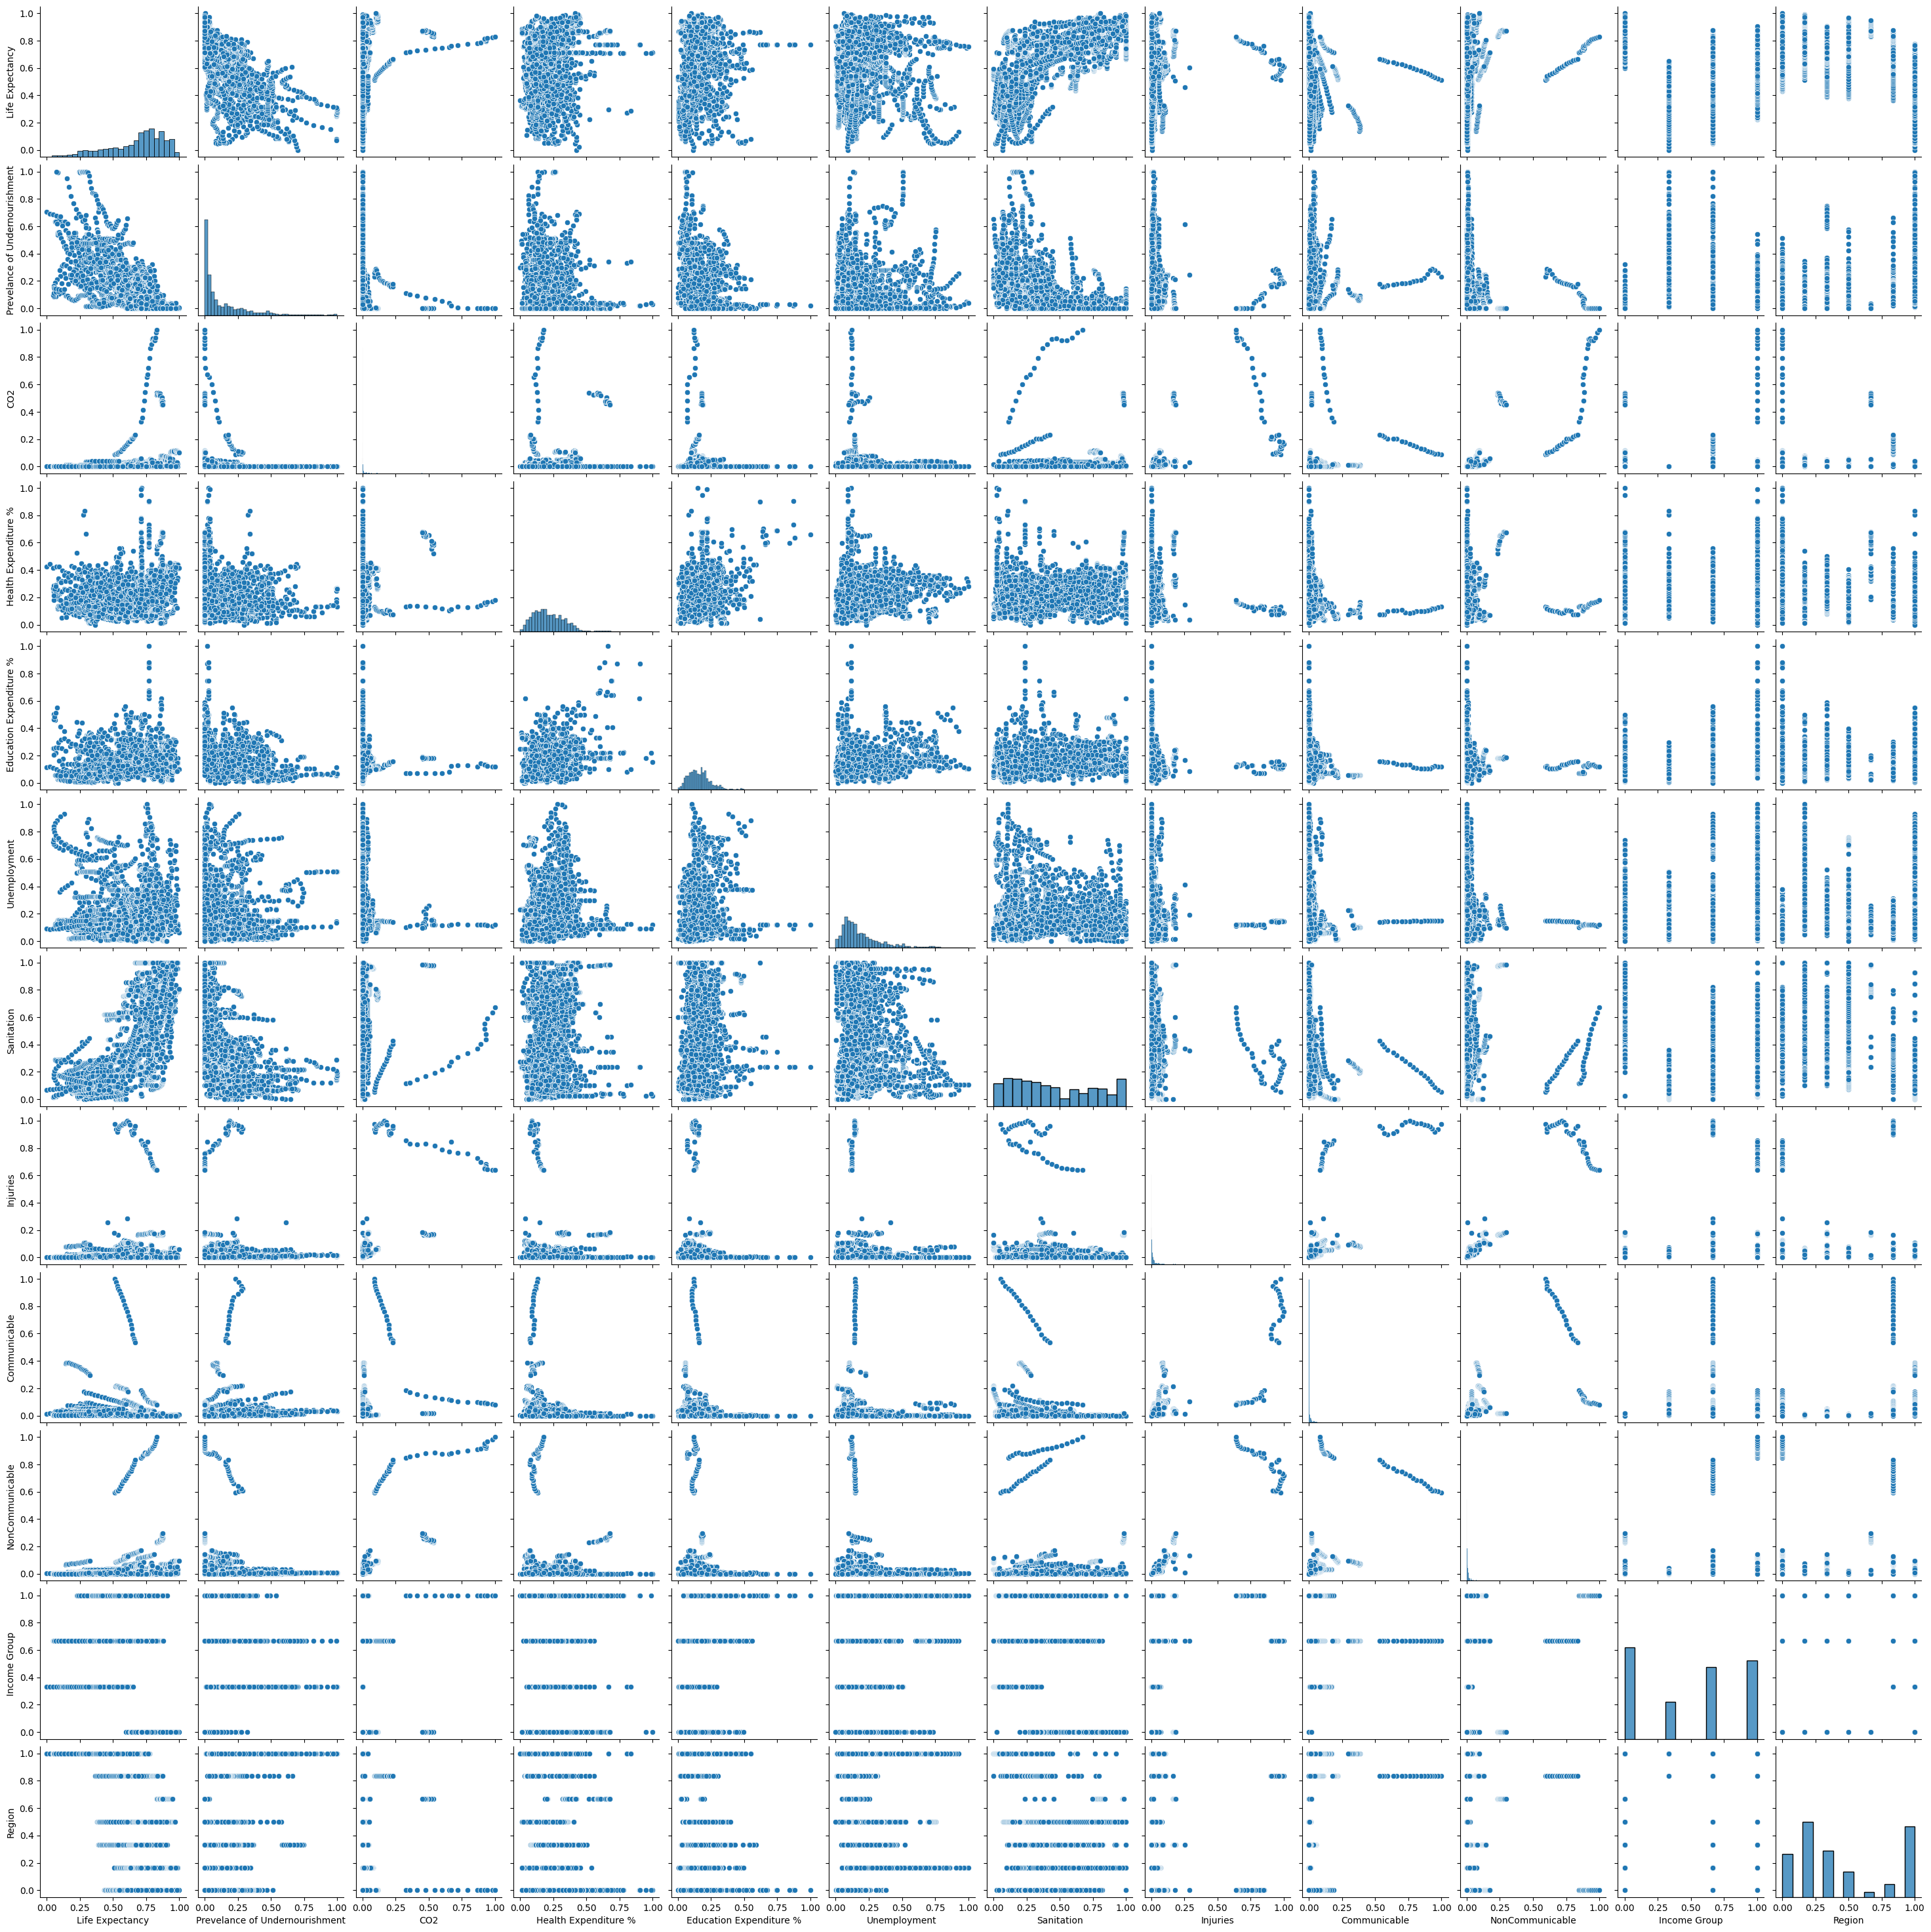

In [18]:
import seaborn
seaborn.pairplot(df_numerical_scaled.drop(['Country', 'Year'], axis = 1))

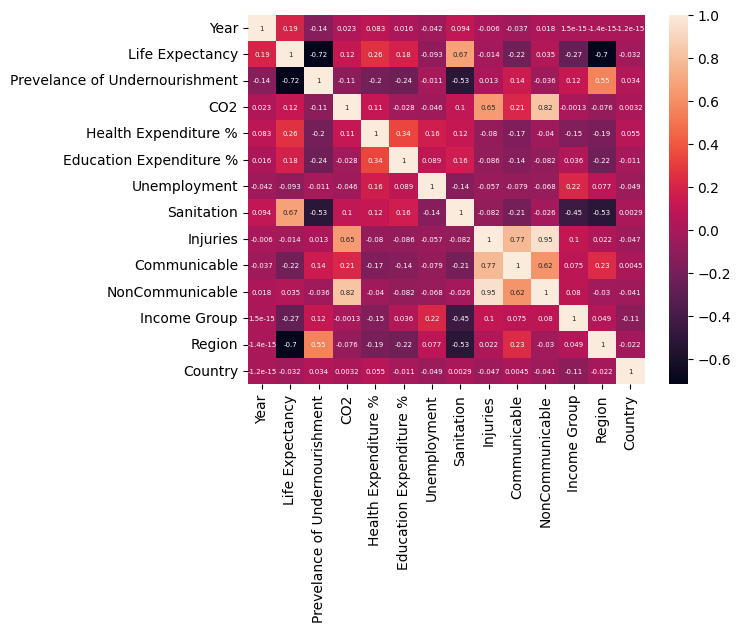

In [19]:
##seaborn.heatmap(df_numerical_scaled.corr(),
 #               xticklabels=df_numerical_scaled.columns,
 #               yticklabels=df_numerical_scaled.columns)
import matplotlib.pyplot as plt 

# setting the parameter values 
annot = True

hm = seaborn.heatmap(df_numerical_scaled.corr(),
               xticklabels=df_numerical_scaled.columns,
               yticklabels=df_numerical_scaled.columns, 
                annot=annot, annot_kws={'size': 5}) 

plt.show() 

In [20]:
list(df_numerical_scaled)

['Year',
 'Life Expectancy',
 'Prevelance of Undernourishment',
 'CO2',
 'Health Expenditure %',
 'Education Expenditure %',
 'Unemployment',
 'Sanitation',
 'Injuries',
 'Communicable',
 'NonCommunicable',
 'Income Group',
 'Region',
 'Country']

Pearson correlation: 0.6725423846309939


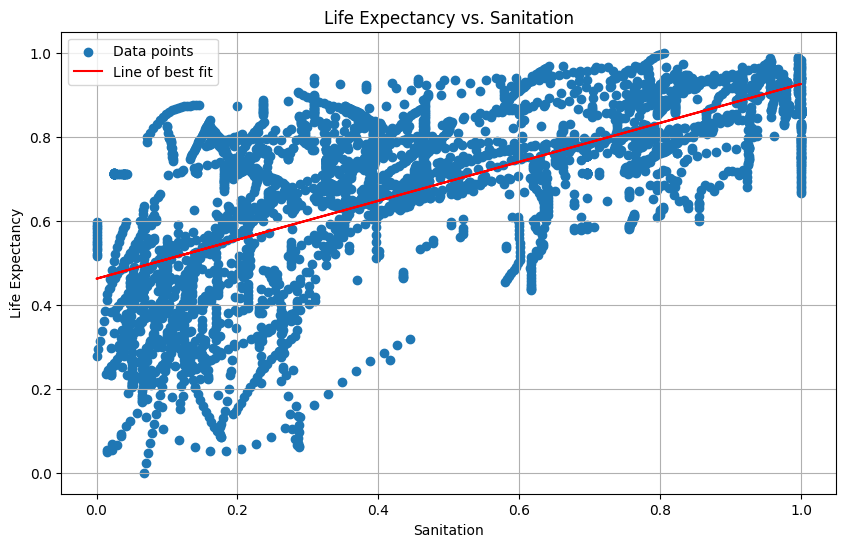

In [21]:
from scipy.stats import pearsonr

#Peason correlation coefficient.
x = df_numerical_scaled['Sanitation']
y = df_numerical_scaled['Life Expectancy']
corr, _ = pearsonr(x, y)
print(f'Pearson correlation: {corr}')

# Line of best fit.
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data points')
plt.plot(x, m*x + b, color='red', label='Line of best fit')
plt.xlabel('Sanitation')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Sanitation')
plt.legend()
plt.grid(True)
plt.show()

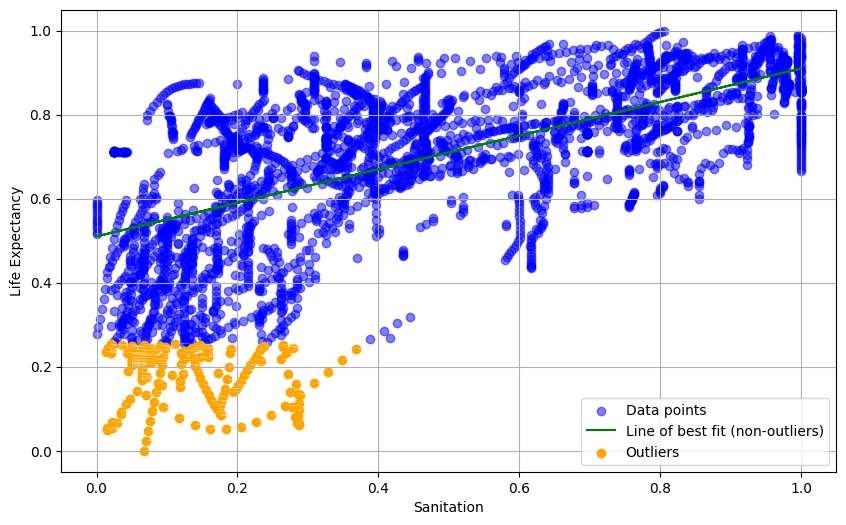

New Pearson correlation (Sanitation vs. Life Expectancy) without outliers: 0.6687041150485598


In [22]:
from scipy.stats import zscore


# Outliers via Z-scores
z_scores = np.abs(zscore(df_numerical_scaled[['Sanitation', 'Life Expectancy']]))
outliers = (z_scores > 2).any(axis=1)


outlier_data = df_numerical_scaled[outliers]
x_outliers = outlier_data['Sanitation']
y_outliers = outlier_data['Life Expectancy']
non_outlier_data = df_numerical_scaled[~outliers]
x_non_outliers = non_outlier_data['Sanitation']
y_non_outliers = non_outlier_data['Life Expectancy']

plt.figure(figsize=(10, 6))
plt.scatter(x_non_outliers, y_non_outliers, label='Data points', color='blue', alpha=0.5)
m_non_outliers, b_non_outliers = np.polyfit(x_non_outliers, y_non_outliers, 1)
plt.plot(x_non_outliers, m_non_outliers*x_non_outliers + b_non_outliers, color='green', label='Line of best fit (non-outliers)')

plt.scatter(x_outliers, y_outliers, label='Outliers', color='orange')
for i in range(len(outlier_data)):
    plt.annotate(outlier_data['Country'].iloc[i], (x_outliers.iloc[i], y_outliers.iloc[i]), fontsize=0, alpha=1, color='white')

plt.xlabel('Sanitation')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

# New pearson
new_corr, _ = pearsonr(x_non_outliers, y_non_outliers)
print(f'New Pearson correlation (Sanitation vs. Life Expectancy) without outliers: {new_corr}')

### 

## Random Forest

In [23]:
from sklearn.model_selection import train_test_split

X = df_numerical_scaled.drop(['Life Expectancy', 'Year', 'Income Group', "Country", 'Region'], axis = 1)
y = df_numerical_scaled['Life Expectancy']
y = [int(label) for label in y]

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = .30, random_state = 42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
#predictions

y_pred = clf.predict(X_test)

In [26]:
#performance evaluation using score
print (clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
1.0


In [27]:
df_numerical_scaled['Region'].unique()

array([0.83333333, 1.        , 0.16666667, 0.5       , 0.33333333,
       0.        , 0.66666667])

In [28]:
#performance evaluation using confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred,  labels = [0,1])
cm

array([[992,   0],
       [  0,   0]])

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (2314).

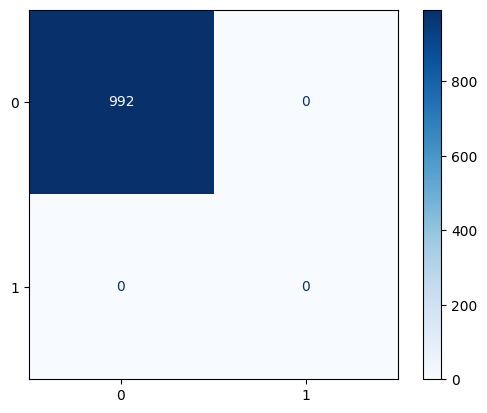

In [29]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [30]:
#important points
pd.DataFrame(clf.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
Health Expenditure %,0.208195
Injuries,0.203504
NonCommunicable,0.119291
CO2,0.116773
Sanitation,0.094587
Education Expenditure %,0.093425
Communicable,0.074870
Prevelance of Undernourishment,0.057019
Unemployment,0.032337


In [ ]:
#tree refining 
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
print (rf_random.score(X_train, y_train))
print(rf_random.score(X_test, y_test))

In [ ]:
param_grid = {
    'n_estimators': np.linspace(2100, 2300, 5, dtype = int),
    'max_depth': [170, 180, 190, 200, 210, 220],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5]
}

In [ ]:
# Base model
from sklearn.model_selection import GridSearchCV
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = True)
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = 8, verbose = 2)
grid_rf_search.fit(X_train, y_train)

In [ ]:
best_rf_grid = grid_rf_search.best_estimator_
grid_rf_search.best_params_

In [ ]:
print (grid_rf_search.score(X_train, y_train))
print(grid_rf_search.score(X_test, y_test))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")